In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub

In [2]:
datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [3]:
data_dir = './train/train'

In [4]:
train_data = datagen.flow_from_directory(data_dir, target_size = (100,100), batch_size = 32, class_mode = 'categorical',
                                        subset = 'training')

val_data = datagen.flow_from_directory(data_dir, target_size = (100,100), batch_size = 32, class_mode = 'categorical',
                                        subset = 'validation')

FileNotFoundError: [Errno 2] No such file or directory: './train/train'

In [ ]:
Efficientnet_b0 = "https://tfhub.dev/google/efficientnet/b0/classification/1"

In [ ]:
def visualize_images(images,labels):
    figure, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 14))
    classes = list(train_data.class_indices.keys())
    img_no = 0
    for i in range(3):
        for j in range(3):
            img = images[img_no]
            lbl = np.argmax(labels[img_no])
            ax[i,j].imshow(img)
            ax[i,j].set_title(classes[lbl])
            ax[i,j].set_axis_off()
            img_no+=1

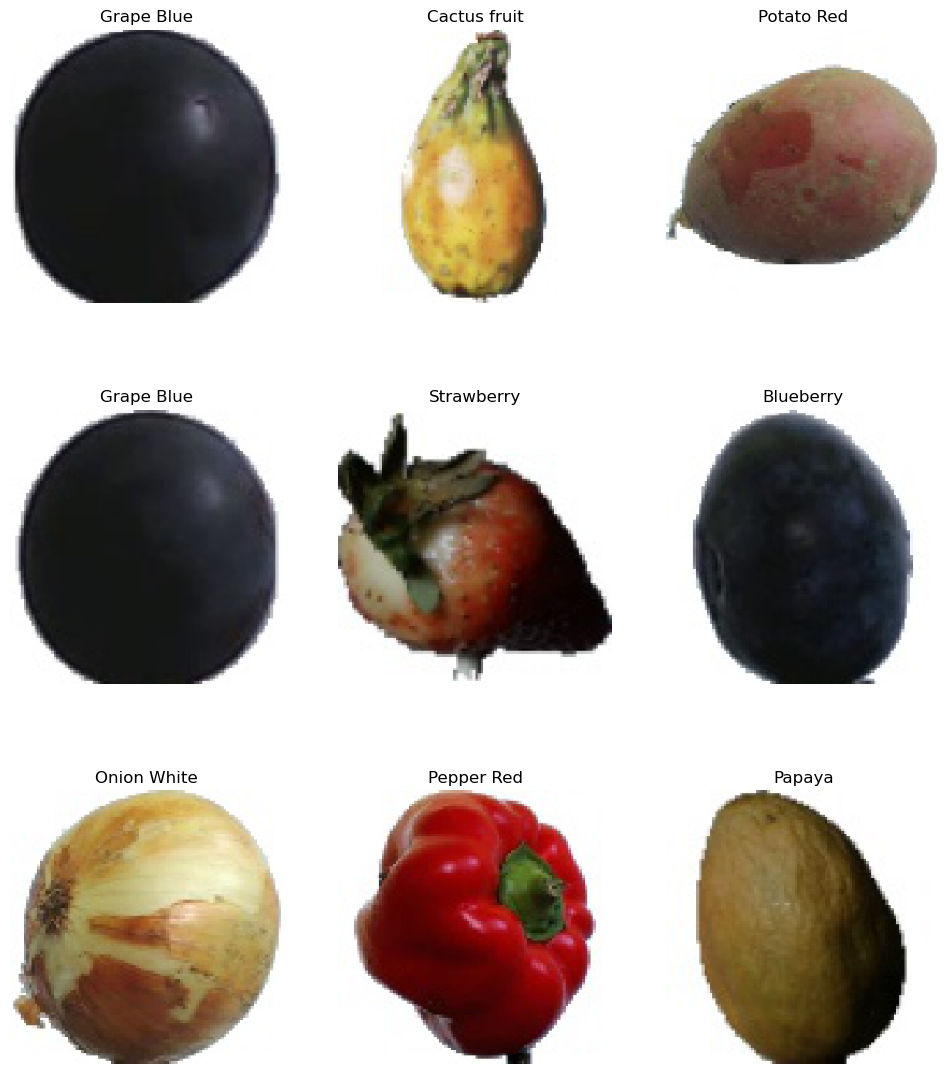

In [ ]:
images, labels = next(train_data)
visualize_images(images,labels)

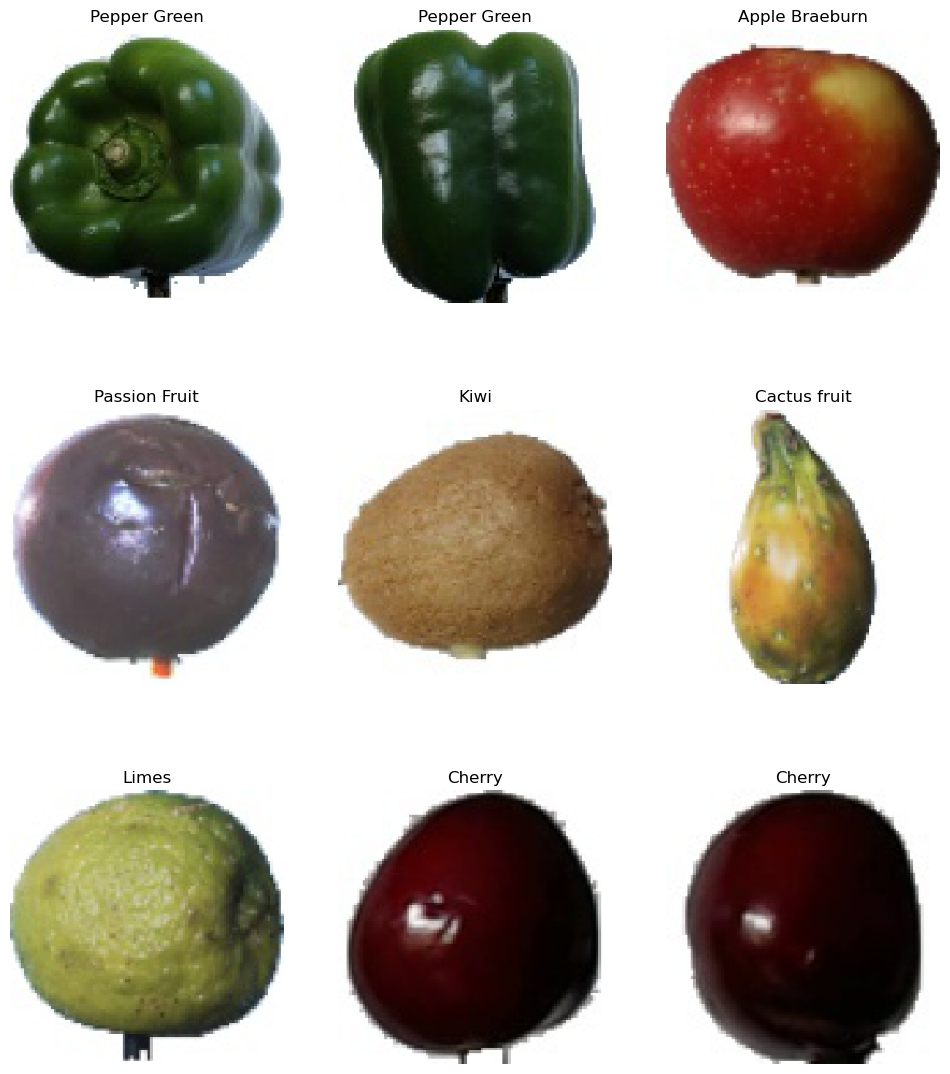

In [ ]:
images, labels = next(val_data)
visualize_images(images,labels)

In [5]:
model_Efficientnet = tf.keras.Sequential([
    hub.KerasLayer(Efficientnet_b0, trainable = False, input_shape = (100,100,3), name = 'Efficientnet_b0'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(33, activation = 'softmax', name = 'Output_layer')
])

model_Efficientnet.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

NameError: name 'Efficientnet_b0' is not defined

In [6]:
efficientnet_model = model_Efficientnet.fit(train_data, epochs = 10, verbose = 1)

NameError: name 'model_Efficientnet' is not defined

In [7]:
model_Efficientnet.evaluate(val_data)

NameError: name 'model_Efficientnet' is not defined

In [8]:
def plot_graph(history):
    loss_ef = history.history['loss']
    
    Accuracy_ef = history.history['accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss_ef, label = 'Efficientnet Loss')
    plt.title('Epochs - Loss')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, Accuracy_ef, label = 'Efficientnet Accuracy')
    plt.title('Epochs - Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    

In [9]:
plot_graph(efficientnet_model)

NameError: name 'efficientnet_model' is not defined

In [10]:
model_name = 'fruit.h5'
model_Efficientnet.save(model_name, save_format='h5')

NameError: name 'model_Efficientnet' is not defined